# Curvas de aprendizado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (15,5)

## Gerando os dados

In [ ]:
samples = 100
X = 6 * np.random.rand(samples, 1) - 3
Y = 0.5 * X**3 + X**2 + 1.1 * X + 2 + np.random.randn(samples, 1)

X_new = np.linspace(-3, 3, samples)[:, np.newaxis]
YY =  0.5 * X_new**3 + X_new**2 + 1.1 * X_new + 2

## Plotando os dados

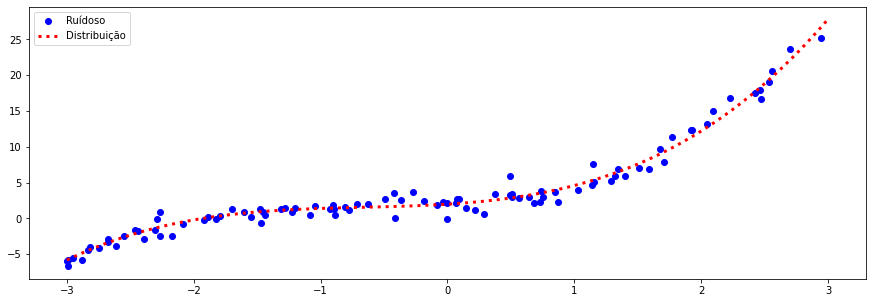

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X, Y, color="b", label="Ruídoso")
ax.plot(X_new, YY, color="r", label="Distribuição", linewidth=3, linestyle="dotted")
ax.legend()

In [ ]:
def plot_learning_curves(model, X, y):
    """
    Adaptado do livro Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow:
    """

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8)
    train_errors, val_errors = list(), list()

    for m in range(1, len(X_train) + 1):

        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(skmet.mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(skmet.mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Treino")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validação")
    plt.legend(fontsize=14)
    plt.xlabel("Nº de amostras de treino", fontsize=14)
    plt.ylabel("MSE", fontsize=14)

## Curva para um modelo linear
- Observe que as curvas vão se encontrando a medida que o número de amostras aumentam
- Ocorre um claro underfitting aqui
- Aumentar o numero de amostras nao adianta, o problema aqui é que o modelo não tem complexidade/capacidade suficiente para generalizar

/home/patcha/gandalf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/patcha/gandalf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


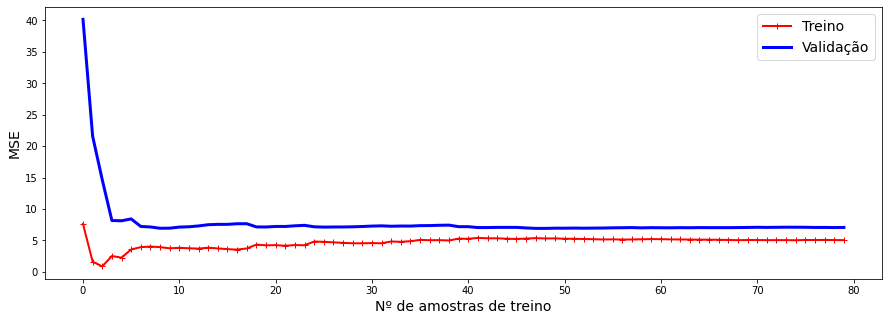

In [ ]:
std_scaler = StandardScaler()
lin_reg = SGDRegressor()
model = Pipeline([("std_scaler", std_scaler),
                  ("lin_reg", lin_reg)
                ])

plot_learning_curves(model, X, Y.ravel())
# plt.axis([0, 80, 0, 5])                         # not shown in the book
# save_fig("underfitting_learning_curves_plot")   # not shown
# plt.show()

## Curva para um polinômio de grau 3
- Este seria o modelo perfeito, porque foi o que geramos os dados
- Observe que as curvas de validação e treinamento vão se aproximando na medida que aumentamos o número de amostras

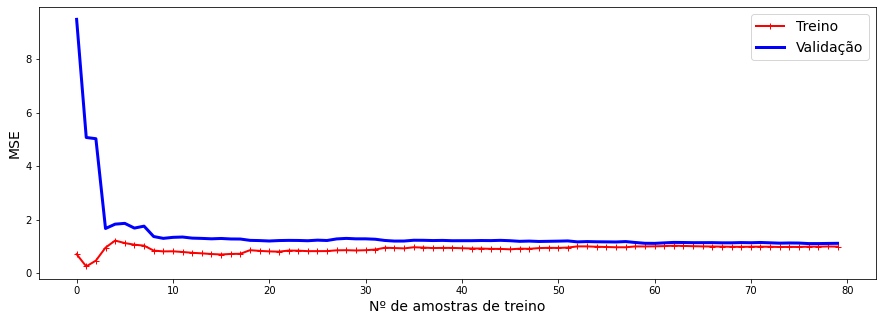

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
std_scaler = StandardScaler()
lin_reg = SGDRegressor()
poly_reg = Pipeline([
                        ("poly_features", poly_features),
                        ("std_scaler", std_scaler),
                        ("lin_reg", lin_reg),
                    ])
plot_learning_curves(poly_reg, X, Y.ravel())
# plt.axis([0, 80, 0, 5])

## Curva para um polinômio de grau 25
- Neste caso, o treinamento fica muito abaixo da validação

(0.0, 80.0, 0.0, 20.0)

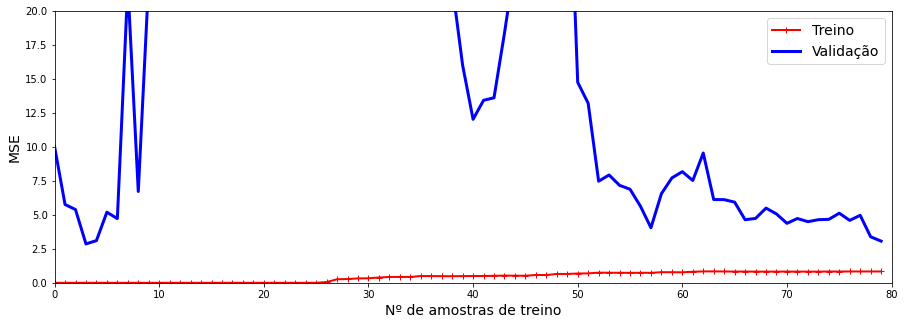

In [ ]:
poly_features = PolynomialFeatures(degree=25, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
poly_reg = Pipeline([
                        ("poly_features", poly_features),
                        ("std_scaler", std_scaler),
                        ("lin_reg", lin_reg),
                    ])
plot_learning_curves(poly_reg, X, Y.ravel())
plt.axis([0, 80, 0, 20])

# Verificando as curvas em tempo real

- Redefinindo os dados

In [ ]:
samples = 100
X = 6 * np.random.rand(samples, 1) - 3
Y = 0.5 * X**3 + X**2 + 1.1 * X + 2 + np.random.randn(samples, 1)

X_new = np.linspace(-3, 6, samples)[:, np.newaxis]
YY =  0.5 * X_new**3 + X_new**2 + 1.1 * X_new + 2

X_val = np.linspace(-2, 4, samples)[:, np.newaxis]
Y_val = 0.5 * X_val**3 + X_val**2 + 1.1 * X_val + 2 + np.random.randn(samples, 1)

- Plotando os dados

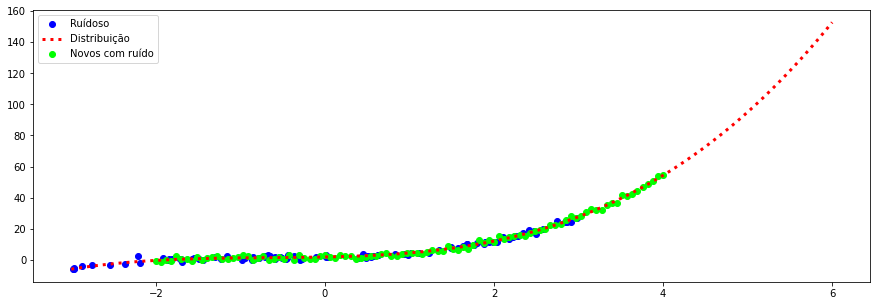

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X, Y, color="b", label="Ruídoso")
ax.plot(X_new, YY, color="r", label="Distribuição", linewidth=3, linestyle="dotted")
ax.scatter(X_val, Y_val, color="lime", label="Novos com ruído")
ax.legend()

- Preprocessando os dados

In [ ]:
# Definindo o polinomio
poly_feat = PolynomialFeatures(degree=3, include_bias=False)
X_train = poly_feat.fit_transform(X)
X_val = poly_feat.fit_transform(X_val)

# Listas para salvar os erros
train_errors, val_errors = list(), list()

# Normalizando os dados
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_val = std_scaler.transform(X_val)

- Realizando o treinamento

In [ ]:
epochs = 200
batch_size = 20
ep = 0

# Defininfo o modelo
model = SGDRegressor()

# Aplicando o SGD
with tqdm(total=epochs, ascii=True, desc=f"Epoca {ep+1}/{epochs}", ncols=100) as t:
    for ep in range(epochs):

        X_train, Y = shuffle(X_train, Y.ravel())

#         model.partial_fit(X_train, Y.ravel())

        b = 0
        while b < X_train.shape[0]:
            batch_X = X_train[b:b + batch_size, :]
            batch_Y = Y[b:b + batch_size]
            b += batch_size
            model.partial_fit(batch_X, batch_Y.ravel())


        pred_train = model.predict(X_train)
        mse_train = skmet.mean_squared_error(Y.ravel(), pred_train)

        pred_val = model.predict(X_val)
        mse_val = skmet.mean_squared_error(Y_val.ravel(), pred_val)

        train_errors.append(mse_train)
        val_errors.append(mse_val)

        t.set_postfix(mse_train=f"{np.mean(mse_train):.2f}", mse_val=f"{np.mean(mse_val):.2f}")
        t.update()


#         print(f"- Epoch {ep+1}: MSE Train: {mse_train:.2f} | MSE Val: {mse_val:.2f}")

Epoca 500/200: 100%|################| 200/200 [00:02<00:00, 82.95it/s, mse_train=0.91, mse_val=1.22]


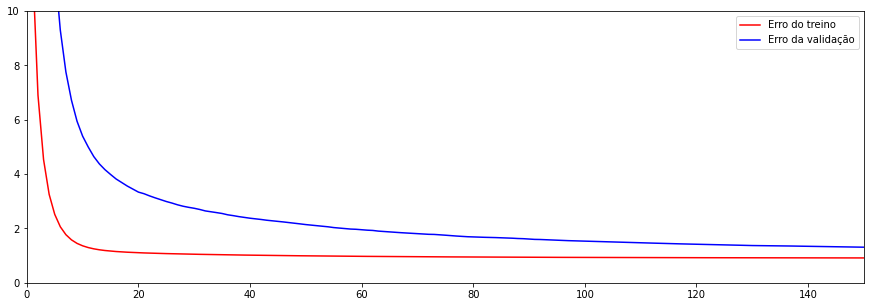

In [ ]:
plt.plot(train_errors, color="r", label="Erro do treino")
plt.plot(val_errors, color="b", label="Erro da validação")
plt.axis([0, 150, 0, 10])
plt.legend()

___
# Exercício
- Implementar a técnica de early stopping no treinamento anterior
___